In [1]:
import datetime
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
plt.style.use('fivethirtyeight')

In [2]:
length = 14
start, end = '2018-01-01', '2020-01-27'

In [3]:
data = web.DataReader('AAPL', 'yahoo', start, end)
close = data['Adj Close']

In [4]:
def calc_rsi(over: pd.Series, fn_roll: Callable) -> pd.Series:
    delta = over.diff()
    delta = delta[1:] 
    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()
    roll_up, roll_down = fn_roll(up), fn_roll(down)
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    rsi[:] = np.select([roll_down == 0, roll_up == 0, True], [100, 0, rsi])
    rsi.name = 'rsi'
    valid_rsi = rsi[length - 1:]
    assert ((0 <= valid_rsi) & (valid_rsi <= 100)).all()
    return rsi

In [5]:
rsi_ema = calc_rsi(close, lambda s: s.ewm(span=length).mean())
rsi_sma = calc_rsi(close, lambda s: s.rolling(length).mean())
rsi_rma = calc_rsi(close, lambda s: s.ewm(alpha=1 / length).mean()) 

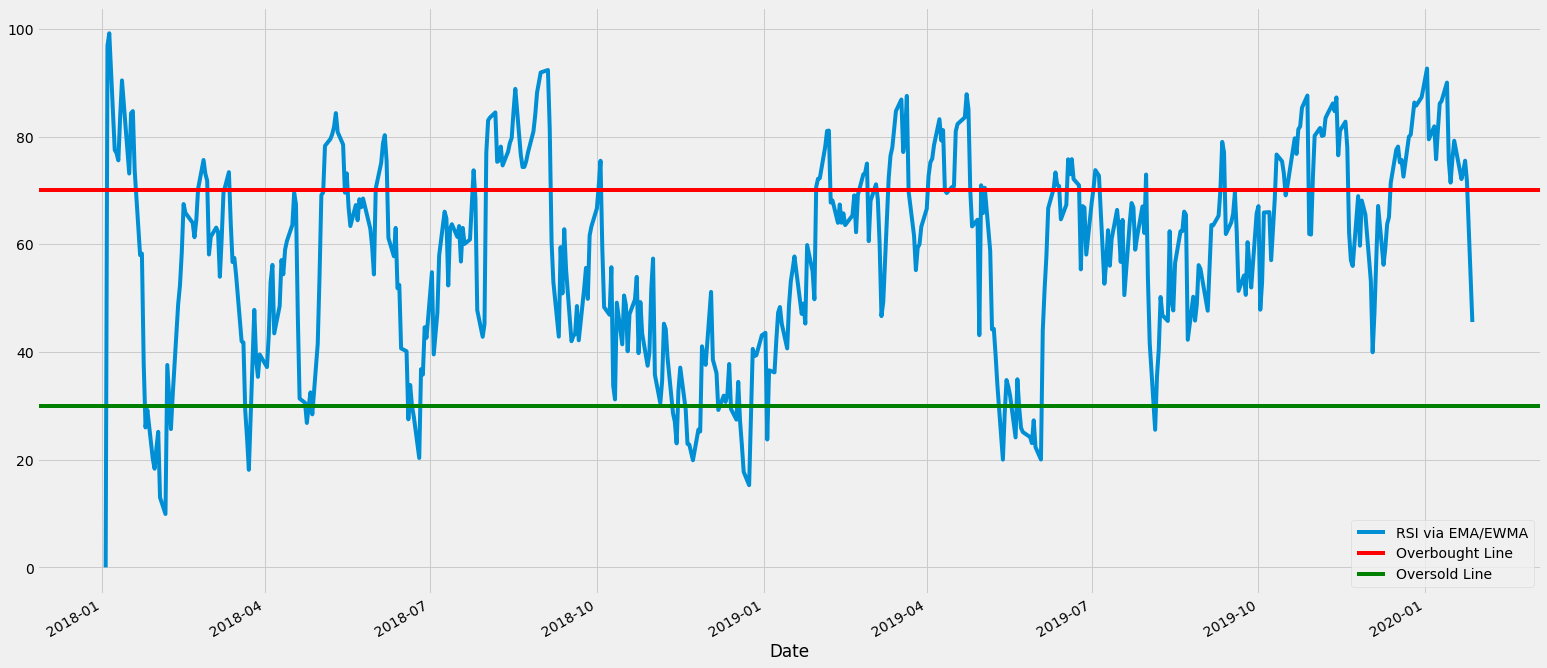

In [6]:
plt.figure(figsize=(24, 12))
rsi_ema.plot()
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.legend(['RSI via EMA/EWMA','Overbought Line','Oversold Line'])
plt.show()

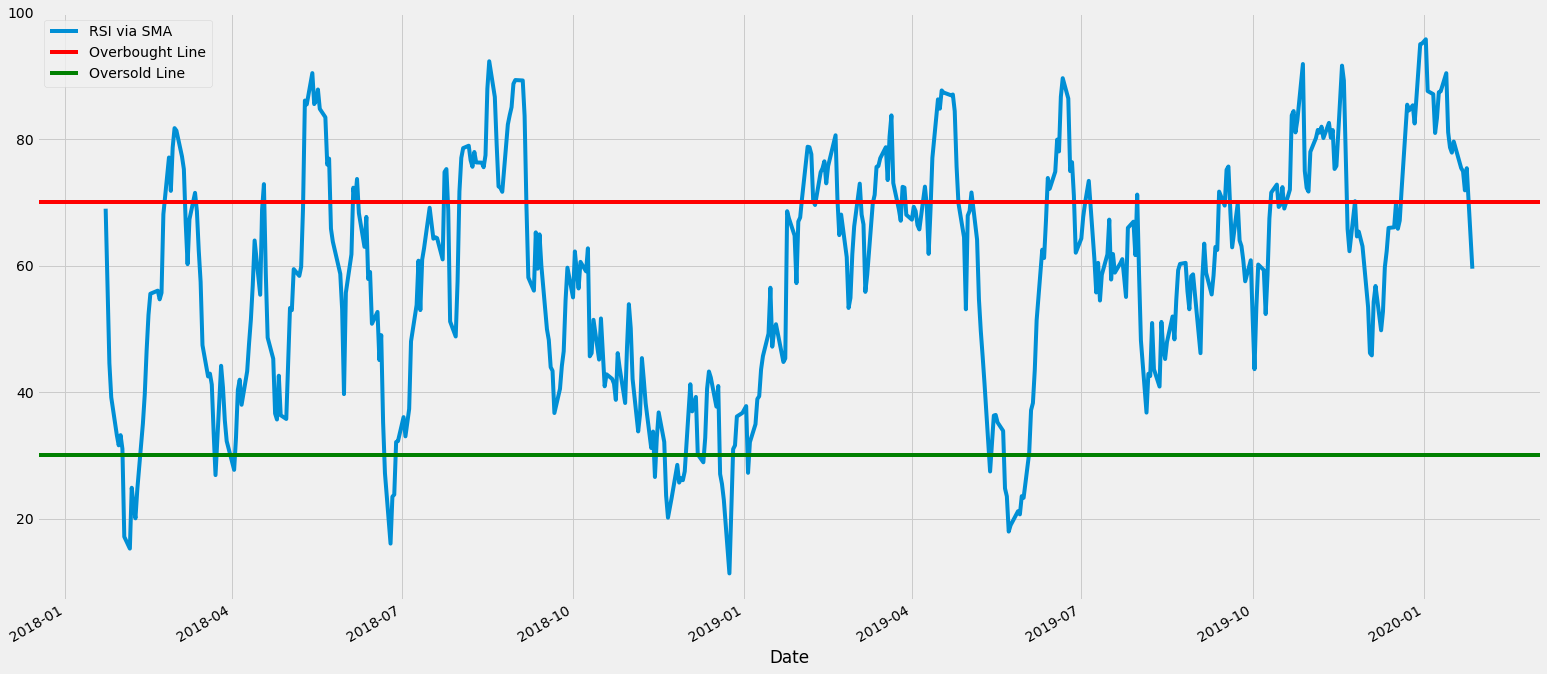

In [7]:
plt.figure(figsize=(24, 12))
rsi_sma.plot()
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.legend(['RSI via SMA','Overbought Line','Oversold Line'])
plt.show()

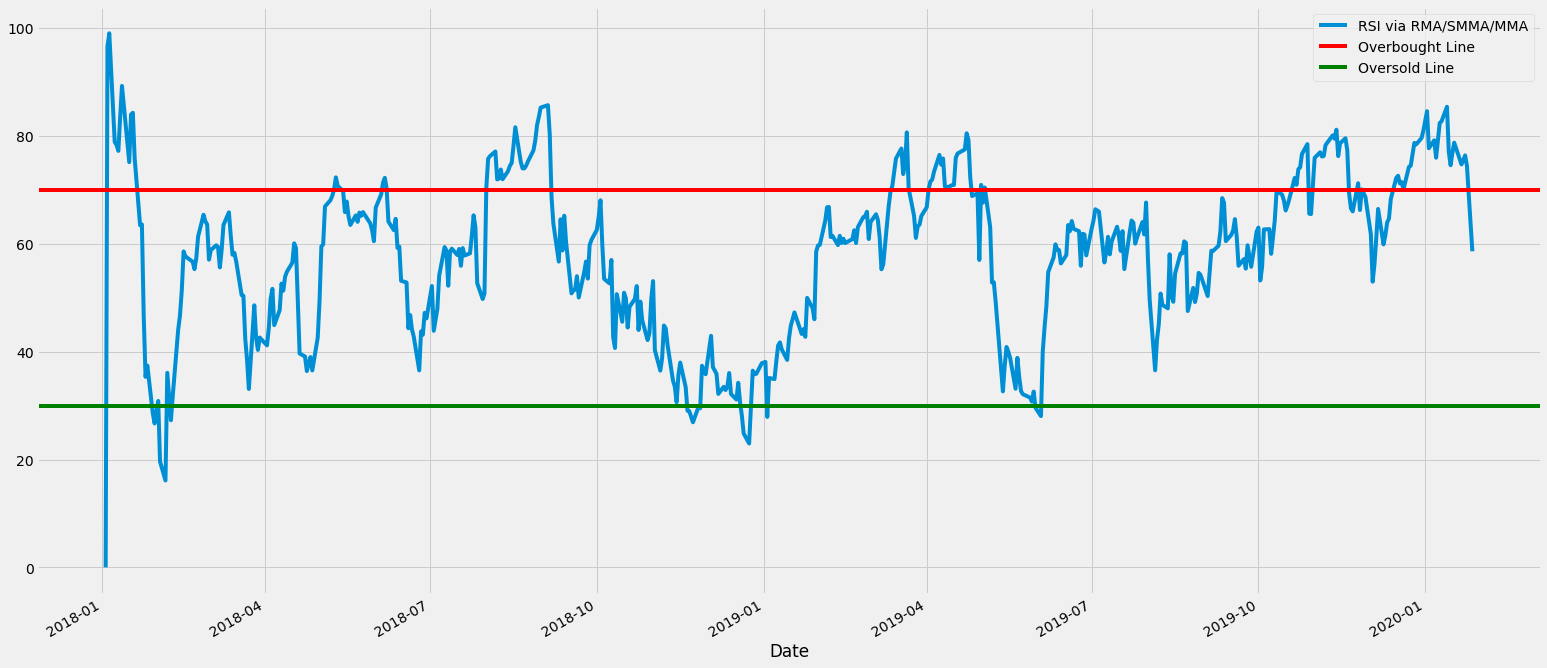

In [8]:
plt.figure(figsize=(24, 12))
rsi_rma.plot()
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.legend(['RSI via RMA/SMMA/MMA','Overbought Line','Oversold Line'])
plt.show()

## Bollinger Bands

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
df=pd.DataFrame(data)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135757
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128586
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319633
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790062
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634842
...,...,...,...,...,...,...
2020-01-21,79.754997,79.000000,79.297501,79.142502,110843200.0,77.884888
2020-01-22,79.997498,79.327499,79.644997,79.425003,101832400.0,78.162903
2020-01-23,79.889999,78.912498,79.480003,79.807503,104472000.0,78.539322


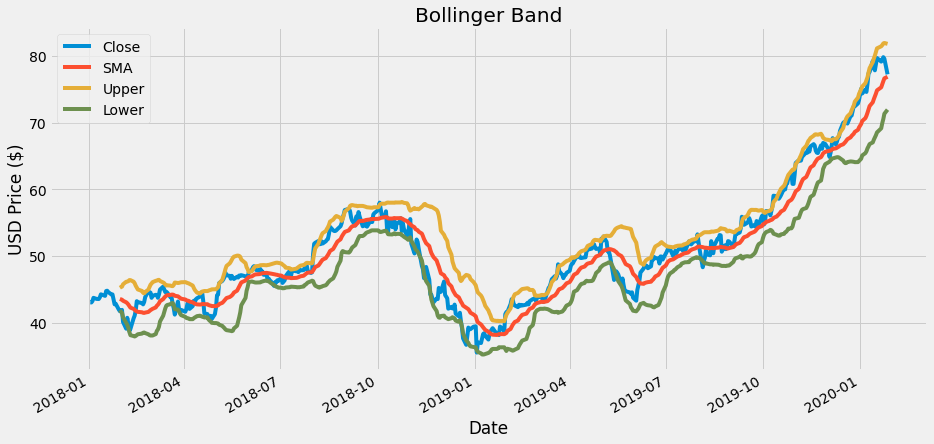

In [11]:
period=20
#SMA
df['SMA']=df['Close'].rolling(window=period).mean()
#SD
df["SD"]=df['Close'].rolling(window=period).std()
#Upper BB
df['Upper']=df['SMA']+(df['SD']*2)
#Lower BB
df['Lower']=df['SMA']-(df['SD']*2)

column_list=['Close','SMA','Upper','Lower']
df[column_list].plot(figsize=(14,7))
plt.title("Bollinger Band")
plt.ylabel('USD Price ($)')
plt.show()

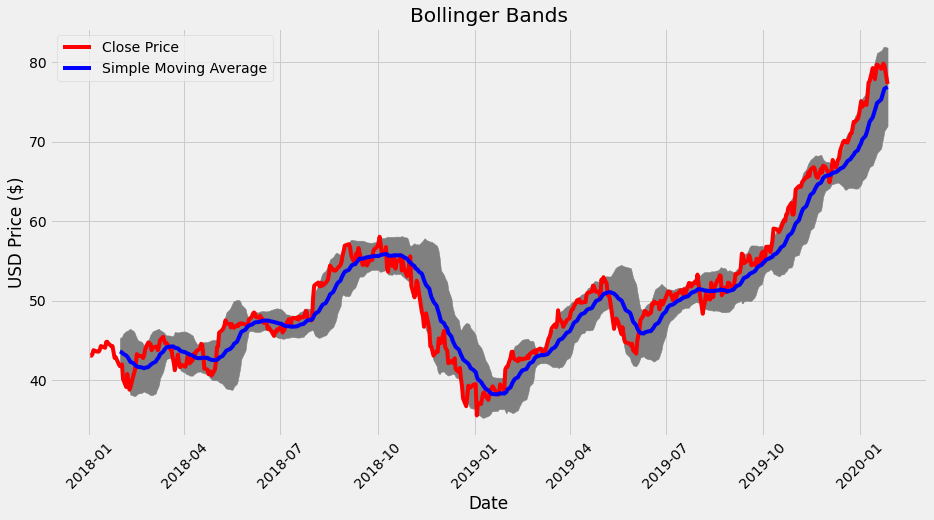

In [12]:
#shading
fig=plt.figure(figsize=(14,7))
ax=fig.add_subplot(1,1,1)
x_axis=df.index
ax.fill_between(x_axis, df['Upper'], df['Lower'], color= 'grey')
ax.plot(x_axis, df['Close'], color='red', lw=4, label='Close Price')
ax.plot(x_axis, df['SMA'], color='blue', lw=4, label='Simple Moving Average')
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [13]:
new_df=df[period-1:]
new_df

,High,Low,Open,Close,Volume,Adj Close,SMA,SD,Upper,Lower
Date,,,,,,,,,,
2018-01-30,41.842499,41.174999,41.382500,41.742500,184192800.0,39.872501,43.583500,0.839961,45.263421,41.903579
2018-01-31,42.110001,41.625000,41.717499,41.857498,129915600.0,39.982353,43.523125,0.918880,45.360885,41.685364
2018-02-01,42.154999,41.689999,41.792500,41.945000,188923200.0,40.065922,43.467500,0.980179,45.427858,41.507142
2018-02-02,41.700001,40.025002,41.500000,40.125000,346375200.0,38.327461,43.310875,1.233136,45.777146,40.844604
2018-02-05,40.970001,39.000000,39.775002,39.122501,290954000.0,37.369873,43.079500,1.541885,46.163271,39.995729
...,...,...,...,...,...,...,...,...,...,...
2020-01-21,79.754997,79.000000,79.297501,79.142502,110843200.0,77.884888,75.290374,3.073059,81.436493,69.144256
2020-01-22,79.997498,79.327499,79.644997,79.425003,101832400.0,78.162903,75.768624,2.924145,81.616915,69.920334
2020-01-23,79.889999,78.912498,79.480003,79.807503,104472000.0,78.539322,76.209000,2.829879,81.868757,70.549242


In [17]:
def get_signal(data):
    buy_signal =[]
    sell_signal = []
    for i in range(len(data['Close'])):
        if data['Close'][i]> data['Upper'][i]:  # Sell Signal
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i]<data['Lower'][i]: #Buy signal
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return (buy_signal, sell_signal)    
    
            

In [18]:
new_df['Buy']=get_signal(new_df)[0]
new_df['Sell']=get_signal(new_df)[1]

<ipython-input-18-f0984f265ce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Buy']=get_signal(new_df)[0]
<ipython-input-18-f0984f265ce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sell']=get_signal(new_df)[1]


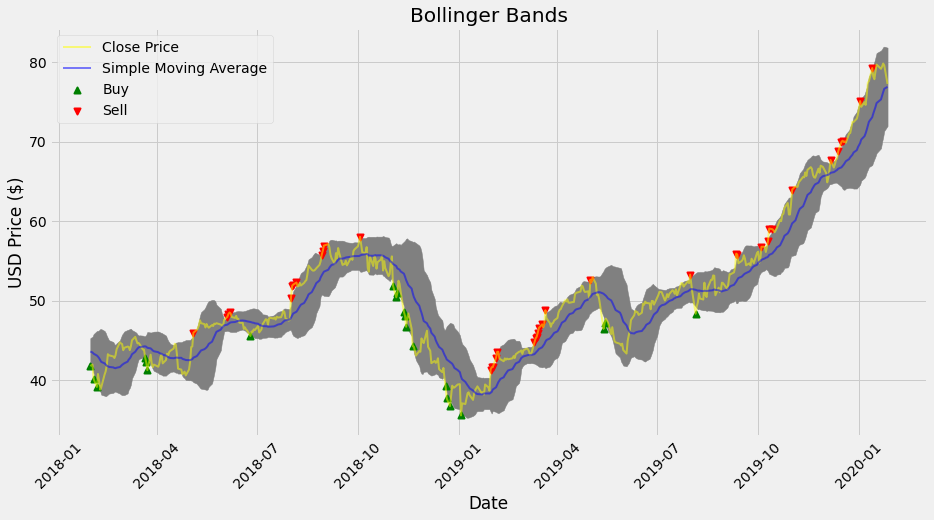

In [19]:
fig=plt.figure(figsize=(14,7))
ax=fig.add_subplot(1,1,1)
x_axis=new_df.index
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color= 'grey')
ax.plot(x_axis, new_df['Close'], color='yellow', lw=2, label='Close Price', alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=2, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=2, label="Buy", marker='^', alpha=1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=2, label="Sell", marker='v', alpha=1)
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()